# LINEAR REGRESSION - n Variable

**Model: **
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b$$

**Loss function: **
$$ \mathcal{L} (a) = \frac{1}{2m} \sum ^{m} _{i=1} (\hat{y} - y)^{2} $$

**Loss function derivative (gradient, slope): **
$$ \mathcal{L}' (w_1) = \frac{\partial \mathcal{L}}{\partial w_1} = \frac{1}{m} \sum ^{m} _{i=1} (\hat{y} - y) x_1 $$ 
$$ \mathcal{L}' (w_2) = \frac{\partial \mathcal{L}}{\partial w_2} = \frac{1}{m} \sum ^{m} _{i=1} (\hat{y} - y) x_2 $$ 
$$ ... $$
$$ \mathcal{L}' (w_n) = \frac{\partial \mathcal{L}}{\partial w_n} = \frac{1}{m} \sum ^{m} _{i=1} (\hat{y} - y) x_n $$ 
$$ \mathcal{L}' (b) = \frac{\partial \mathcal{L}}{\partial b} = \frac{1}{m} \sum ^{m} _{i=1} (\hat{y} - y) $$

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

**Implement with for-loop**

In [2]:
class model_1():
    def __init__(self,
                X_train,
                Y_train,
                num_step = 10000,
                lr = 0.1):
        self.X_train = X_train
        self.Y_train = Y_train
        self.num_step = num_step
        self.lr = lr
        
    # Initialize weight and bias
    def initialize(self):
        self.W = [0 for _ in range(len(self.X_train[0]))]
        self.b = 0

    # Prediction of 1 data point
    def predict(self, x):
        y_hat = 0;
        for i in range(len(self.W)):
            y_hat += self.W[i] * x[i]

        y_hat += self.b
        return y_hat

    # Gradient of 1 data point
    def grad(self,x, y):
        dW = []
        db = 0
        y_hat = self.predict(x)
        
        for i in range(len(self.W)):
            dW.append((y_hat - y) * x[i])

        db = (y_hat - y)

        return {"dW":dW, "db" : db}

    # Gradient of all data point
    def grads(self):
        dW = [0 for _ in range(len(self.W))]
        db = 0
        m = len(self.Y_train)

        for i in range(m):
            x = self.X_train[i]
            y = self.Y_train[i]
            gradient = self.grad(x,y)
            for j in range(len(gradient["dW"])):
                dW[j] += gradient["dW"][j]/m
            db += gradient["db"]/m

        return {"dW":dW, "db" : db}

    # Calculate loss with respect to W and b
    def loss(self):
        total = 0
        m = len(self.Y_train)
        for i in range(m):
            x = self.X_train[i]
            y = self.Y_train[i]
            y_hat = self.predict(x)
            total = total + (y_hat - y)**2
        return total* 1 / (2*m)

    def train(self):
        self.initialize()
        for i in range(self.num_step):
            gradient = self.grads()
            for j in range(len(self.W)):
                self.W[j] = self.W[j] - self.lr * gradient["dW"][j]

            self.b = self.b - self.lr * gradient["db"]

            if i%500==0:
                print("At step " + str(i) + " " + str(self.loss()))

        print("W :" + str(self.W))
        print("b :" + str(self.b))

In [3]:
def genData_model_1():
    x_train = []
    y_train = []
    W = [2]
    b = 10
    m = 1000
    for i in range(m):
        x = []
        y = 0

        for j in range(len(W)):
            xj = random.randint(0, 1)
            y += xj * W[j]
            x.append(xj)

        y += b
        x_train.append(x)
        y_train.append(y)
    return x_train, y_train

In [4]:
X_1,Y_1 = genData_model_1()
model = model_1(X_train = X_1, Y_train = Y_1, num_step = 10000, lr = 0.003)
model.train()

At step 0 26.3501181875
At step 500 1.06269451524
At step 1000 0.323924639618
At step 1500 0.176715019809
At step 2000 0.0992681280525
At step 2500 0.0558217156453
At step 3000 0.0313915460759
At step 3500 0.0176531740818
At step 4000 0.0099273405948
At step 4500 0.00558268394065
At step 5000 0.00313944703372
At step 5500 0.00176548194064
At step 6000 0.000992826586739
At step 6500 0.000558320427213
At step 7000 0.000313973964443
At step 7500 0.000176564649157
At step 8000 9.92919122683e-05
At step 8500 5.58372465211e-05
At step 9000 3.14003228242e-05
At step 9500 1.76581105784e-05
W :[2.008682060064042]
b :9.99468235417


**Implement with vectorize**

**Input:** 

Training set contain m data point which is represented by a matrix **X** with m column and each column is one data point with n features.

$$ 
X = \begin{bmatrix}
x^{(1)}_1 \space \space \space x^{(2)}_1 \space \space \space x^{(3)}_1 \space \space \space ... \space \space \space x^{(m)}_1 \\
x^{(1)}_2 \space \space \space x^{(2)}_2 \space \space \space x^{(3)}_2 \space \space \space ... \space \space \space x^{(m)}_2 \\
\vdots \\
x^{(1)}_n \space \space \space x^{(2)}_n \space \space \space x^{(3)}_n \space \space \space ... \space \space \space x^{(m)}_n \\
\end{bmatrix}
$$

**Model: **
$$ \hat{Y} = WX + b$$

** With: **

$$ 
Y = \begin{bmatrix}
y^{(1)} \space \space \space x^{(2)} \space \space \space x^{(3)} \space \space \space ... \space \space \space y^{(m)}
\end{bmatrix}
$$

$$ 
W = \begin{bmatrix}
w_{1} \space \space w_{2} \space \space w_{3} \space \space ... \space \space w_{n}
\end{bmatrix}
$$


**Loss function: **
$$ \mathcal{L} (a) = \frac{1}{2m} \sum ^{m} _{i=1} (\hat{Y} - Y)^{2} $$

**Loss function derivative (gradient, slope): **
$$ \mathcal{L}' (W) = \frac{\partial \mathcal{L}}{\partial W} = \frac{1}{m} (\hat{Y} - Y) X^T $$ 
$$ \mathcal{L}' (b) = \frac{\partial \mathcal{L}}{\partial b} = \frac{1}{m} \sum ^{m} _{i=1} (\hat{Y} - Y) $$

In [27]:
class model_2():
    
    def __init__(self,
                 X_train,
                 Y_train,
                 num_step = 10000,
                 lr = 0.1):
        self.X_train = X_train
        self.Y_train = Y_train
        self.num_step = num_step
        self.lr = lr
        
    def initialize(self):
        self.W = np.random.rand(1, self.X_train.shape[0])
        self.b = 0
        
    # Prediction of datas point
    # X : matrix (n x m)
    # W : vector n dimension
    # b : scalar
    def predict(self,X):
        Y_hat = np.dot(self.W, X) + self.b
        return Y_hat

    # Gradient on data set
    # X : matrix (m x n)
    # Y : matrix (m x 1)
    # W : Vector n dimension
    # b : scalar
    def grad(self):
        m = self.Y_train.shape[0] * 1.0
        Y_hat = self.predict(self.X_train)
        dW = 1/m * np.dot((Y_hat - self.Y_train), np.transpose(self.X_train))
        db = 1/m * np.sum(Y_hat - self.Y_train)    
        return {"dW":dW, "db" : db}

    def loss(self):
        m = self.Y_train.shape[0]
        Y_hat = self.predict(self.X_train) 
        return 1/(2.0*m) * np.sum(np.square(Y_hat - self.Y_train))

    def train(self):
        self.initialize()
        self.losses = []
        for i in range(self.num_step):
            gradient = self.grad()
            self.W = self.W - self.lr * gradient["dW"]
            self.b = self.b - self.lr * gradient["db"]
            self.losses.append(self.loss())

            if i%500==0:
                print("At step " + str(i) + " " + str(self.losses[-1]))

        print("W :" + str(self.W))
        print("b :" + str(self.b))

In [28]:
def genData_model_2():
    W = np.array([[2]])
    b = 10
    m = 1000
    X_train = np.random.rand(W.shape[1], m)
    Y_train = np.dot(W, X_train) + b
    return X_train, Y_train

In [38]:
X_2,Y_2 = genData_model_2()
model = model_2(X_train = X_2, Y_train = Y_2, num_step = 10000, lr = 0.000003)
model.train()

At step 0 59866.0854928
At step 500 1556.72320744
At step 1000 246.848946682
At step 1500 178.598983618
At step 2000 144.673151469
At step 2500 117.567047792
At step 3000 95.5477123786
At step 3500 77.6525923813
At step 4000 63.1090511447
At step 4500 51.2893674331
At step 5000 41.6833903233
At step 5500 33.8765150713
At step 6000 27.531788189
At step 6500 22.3753641508
At step 7000 18.1846859145
At step 7500 14.7788791092
At step 8000 12.010945295
At step 8500 9.76141734513
At step 9000 7.93320311148
At step 9500 6.44739481807
W :[[ 2.34210199]]
b :9.8138653596


## **Plot data to graph**

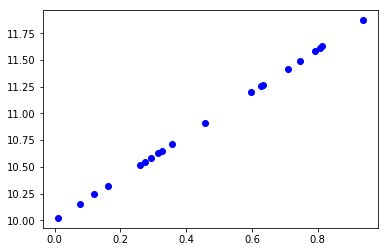

In [34]:
# Plot first 20 data point
plt.plot(X_2[:,:20],Y_2[:,:20], "bo")
plt.show()

## **Plot loss to graph - Learning Curve**

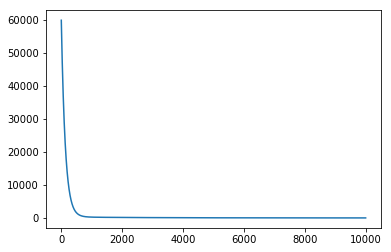

In [39]:
plt.plot(model.losses)
plt.show()